***20.NEURAL NETWORKS***

In [1]:
#20.1 Preprocessing Data for neural Networks
from sklearn import preprocessing
import numpy as np
features=np.array([[-100.1,3240.1],[-200.2,4300.2],[5000.5,150.1],[6000.6,125.1],[9000.9,-673.1]])
scaler=preprocessing.StandardScaler()
features_standardized=scaler.fit_transform(features)    
features_standardized

array([[-1.12541308,  0.92260586],
       [-1.15329466,  1.46248424],
       [ 0.29529406, -0.65104209],
       [ 0.57385917, -0.66377387],
       [ 1.40955451, -1.07027413]])

In [1]:
#20.2 Designing a Neural Network
%pip install keras
from keras import models
from keras import layers
network=models.Sequential()
network.add(layers.Dense(units=16,activation='relu',input_shape=(2,)))
network.add(layers.Dense(units=16,activation='relu'))
network.add(layers.Dense(units=1,activation='sigmoid'))
network.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
#20.3 Training a binary Classifier
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
np.random.seed(0)
number_of_features=10000
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=number_of_features)
tokenizer=Tokenizer(num_words=number_of_features)
x_train=tokenizer.sequences_to_matrix(train_data,mode='binary')
x_test=tokenizer.sequences_to_matrix(test_data,mode='binary')
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')
network=models.Sequential()
network.add(layers.Dense(units=16,activation='relu',input_shape=(number_of_features,)))
network.add(layers.Dense(units=16,activation='relu'))
network.add(layers.Dense(units=1,activation='sigmoid'))
network.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history=network.fit(x_train,y_train,epochs=4,batch_size=512)



c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7309 - loss: 0.5655
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9031 - loss: 0.2945
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9241 - loss: 0.2192
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9385 - loss: 0.1789


In [7]:
x_train.shape

(25000, 10000)

In [12]:
#20.4 Training a multi-class Classifier
import numpy as np
from keras.datasets import reuters
from keras import models
from keras import layers
from keras.utils import to_categorical

from tensorflow.keras.preprocessing.text import Tokenizer
np.random.seed(0)
number_of_features=5000
data= reuters.load_data(num_words=number_of_features)
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=number_of_features)
tokenizer=Tokenizer(num_words=number_of_features)
x_train=tokenizer.sequences_to_matrix(train_data,mode='binary')
x_test=tokenizer.sequences_to_matrix(test_data,mode='binary')
num_classes=np.max(train_labels)+1
y_train=to_categorical(train_labels,num_classes)
y_test=to_categorical(test_labels,num_classes)
network=models.Sequential()
network.add(layers.Dense(units=64,activation='relu',input_shape=(number_of_features,)))
network.add(layers.Dense(units=64,activation='relu'))
network.add(layers.Dense(units=num_classes,activation='softmax'))
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history=network.fit(x_train,y_train,epochs=10,batch_size=512,validation_data=(x_test,y_test))



Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3432 - loss: 3.1841 - val_accuracy: 0.6162 - val_loss: 1.8597
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6644 - loss: 1.6281 - val_accuracy: 0.6946 - val_loss: 1.4082
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7400 - loss: 1.2011 - val_accuracy: 0.7248 - val_loss: 1.2336
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7857 - loss: 0.9783 - val_accuracy: 0.7542 - val_loss: 1.1229
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8234 - loss: 0.8245 - val_accuracy: 0.7627 - val_loss: 1.0515
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8508 - loss: 0.6893 - val_accuracy: 0.7752 - val_loss: 1.0017
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8725 - loss: 0.5833 - val_accuracy: 0.7867 - val_loss: 0.9629
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8986 - loss: 0.5000 - val_accuracy: 0.7925 - v

In [15]:
#20.5 Training a regressor
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# Set random seed
np.random.seed(0)
# Generate features matrix and target vector
features, target = make_regression(n_samples = 10000,
 n_features = 3,
 n_informative = 3,
 n_targets = 1,
 noise = 0.0,
 random_state = 0)
# Divide our data into training and test sets
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.33, random_state=0)
# Start neural network
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32,
 activation="relu",
input_shape=(features_train.shape[1],)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation="relu"))
# Add fully connected layer with no activation function
network.add(layers.Dense(units=1))
# Compile neural network
network.compile(loss="mse", # Mean squared error
 optimizer="RMSprop", # Optimization algorithm
 metrics=["mse"]) # Mean squared error
# Train neural network
history = network.fit(features_train, # Features
 target_train, # Target vector
epochs=10, # Number of epochs
 verbose=0, # No output
 batch_size=100, # Number of observations per batch
 validation_data=(features_test, target_test)) # Test data


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
#20.6 Making prediction
# Load libraries
import numpy as np
from keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
# Set random seed
np.random.seed(0)
# Set the number of features we want
number_of_features = 10000
# Load data and target vector from IMDB movie data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
 num_words=number_of_features)
# Convert IMDB data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")
# Start neural network
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,
 activation="relu",
input_shape=(number_of_features,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))
# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
 optimizer="rmsprop", # Root Mean Square Propagation
 metrics=["accuracy"]) # Accuracy performance metric
history = network.fit(features_train, # Features
 target_train, # Target vector
epochs=3, # Number of epochs
 verbose=0, # No output
 batch_size=100, # Number of observations per batch
 validation_data=(features_test, target_test)) # Test data
# Predict classes of test set
predicted_target = network.predict(features_test)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [17]:
predicted_target

array([[0.07674069],
       [0.99977756],
       [0.70133185],
       ...,
       [0.08947548],
       [0.03515903],
       [0.44527537]], dtype=float32)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


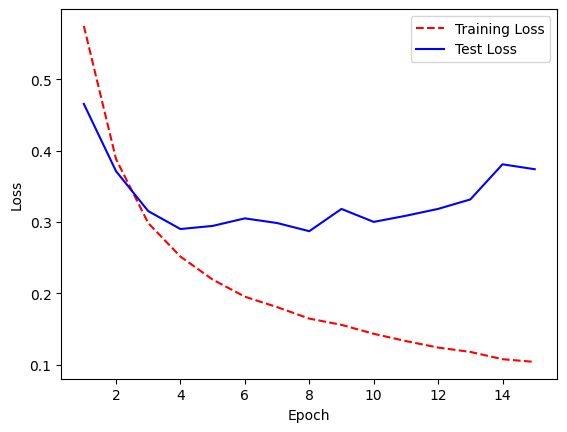

In [18]:
#20.7 Visualize Taining History
import numpy as np
from keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import matplotlib.pyplot as plt
# Set random seed
np.random.seed(0)
number_of_features = 10000
# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
 num_words=number_of_features)
# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")
# Start neural network
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,
 activation="relu",
input_shape=(number_of_features,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))
# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
 optimizer="rmsprop", # Root Mean Square Propagation
 metrics=["accuracy"]) # Accuracy performance metric
# Train neural network
history = network.fit(features_train, # Features
 target_train, # Target
epochs=15, # Number of epochs
 verbose=0, # No output
 batch_size=1000, # Number of observations per batch
 validation_data=(features_test, target_test)) # Test data
# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

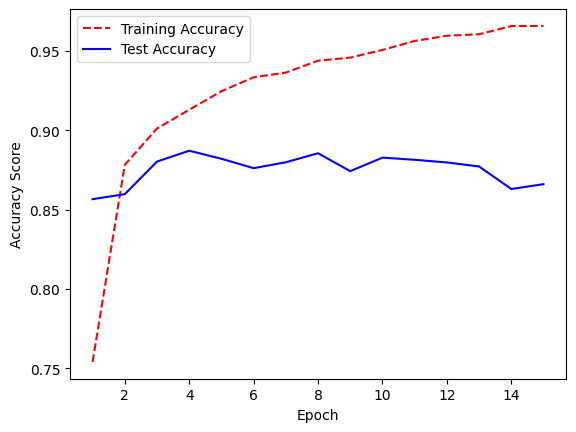

In [21]:
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
# Visualize accuracy history
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

In [22]:
#20.8 Reducing Overfitting with weight Regularization
import numpy as np
from keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import regularizers
# Set random seed
np.random.seed(0)
# Set the number of features we want
number_of_features = 1000
# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
 num_words=number_of_features)
# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")
# Start neural network
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,
 activation="relu",
kernel_regularizer=regularizers.l2(0.01),
 input_shape=(number_of_features,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,
 kernel_regularizer=regularizers.l2(0.01),
 activation="relu"))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))
# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
 optimizer="rmsprop", # Root Mean Square Propagation
 metrics=["accuracy"]) # Accuracy performance metric
# Train neural network
history = network.fit(features_train, # Features
 target_train, # Target vector
epochs=3, # Number of epochs
 verbose=0, # No output
 batch_size=100, # Number of observations per batch
 validation_data=(features_test, target_test)) # Test data

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
#20.9 Reducing Overfitting with Early Stopping
import numpy as np
from keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
# Set random seed
np.random.seed(0)
# Set the number of features we want
number_of_features = 1000
# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
 num_words=number_of_features)
# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")
# Start neural network
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,
 activation="relu",
input_shape=(number_of_features,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))
# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
 optimizer="rmsprop", # Root Mean Square Propagation
 metrics=["accuracy"]) # Accuracy performance metric
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
 ModelCheckpoint(filepath="best_model.h5",
 monitor="val_loss",
save_best_only=True)]
# Train neural network
history = network.fit(features_train, # Features
 target_train, # Target vector
epochs=20, # Number of epochs
 callbacks=callbacks, # Early stopping
 verbose=0, # Print description after each epoch
 batch_size=100, # Number of observations per batch
 validation_data=(features_test, target_test)) # Test data

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
#20.10 Reducing Overfitting with Dropout
import numpy as np
from keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
# Set random seed
np.random.seed(0)
# Set the number of features we want
number_of_features = 1000
# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
 num_words=number_of_features)
# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")
# Start neural network
network = models.Sequential()
# Add a dropout layer for input layer
network.add(layers.Dropout(0.2, input_shape=(number_of_features,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))
# Add a dropout layer for previous hidden layer
network.add(layers.Dropout(0.5))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))
# Add a dropout layer for previous hidden layer
network.add(layers.Dropout(0.5))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))
# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
 optimizer="rmsprop", # Root Mean Square Propagation
 metrics=["accuracy"]) # Accuracy performance metric
# Train neural network
history = network.fit(features_train, # Features
 target_train, # Target vector
epochs=3, # Number of epochs
 verbose=0, # No output
 batch_size=100, # Number of observations per batch
 validation_data=(features_test, target_test)) # Test data

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\regularization\dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
#20.11 Saving Model Training Progress
import numpy as np
from keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint
# Set random seed
np.random.seed(0)
# Set the number of features we want
number_of_features = 1000
# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
 num_words=number_of_features)
# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")
# Start neural network
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,
 activation="relu",
input_shape=(number_of_features,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))
# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
 optimizer="rmsprop", # Root Mean Square Propagation
 metrics=["accuracy"]) # Accuracy performance metric
# Set callback functions to early stop training and save the best model so far
checkpoint = [ModelCheckpoint(filepath="models.keras")]
# Train neural network
history = network.fit(features_train, # Features
 target_train, # Target vector
epochs=3, # Number of epochs
 callbacks=checkpoint, # Checkpoint
 verbose=0, # No output
 batch_size=100, # Number of observations per batch
 validation_data=(features_test, target_test)) # Test data

In [3]:
#20.12 k-fold Cross-Validation with Neural Networks
%pip install scikeras
import numpy as np
from keras import models
from keras import layers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
# Set random seed
np.random.seed(0)
# Number of features
number_of_features = 100
# Generate features matrix and target vector
features, target = make_classification(n_samples = 10000,
 n_features = number_of_features,
 n_informative = 3,
 n_redundant = 0,
 n_classes = 2,
 weights = [.5, .5],
 random_state = 0)
# Create function returning a compiled network
def create_network():
 # Start neural network
 network = models.Sequential()
 # Add fully connected layer with a ReLU activation function
 network.add(layers.Dense(units=16, activation="relu", input_shape=(
 number_of_features,)))
 # Add fully connected layer with a ReLU activation function
 network.add(layers.Dense(units=16, activation="relu"))
 # Add fully connected layer with a sigmoid activation function
 network.add(layers.Dense(units=1, activation="sigmoid"))
 network.compile(loss="binary_crossentropy", # Cross-entropy
 optimizer="rmsprop", # Root Mean Square Propagation
 metrics=["accuracy"]) # Accuracy performance metric
 # Return compiled network
 return network
# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network,
 epochs=10,
batch_size=100,
verbose=0)
# Evaluate neural network using three-fold cross-validation
cross_val_score(neural_network, features, target, cv=3)


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\den

array([0.91271746, 0.82208221, 0.91059106])

In [ ]:
#20.13 Tuning Neural Networks
import numpy as np
from keras import models
from keras import layers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
# Set random seed
np.random.seed(0)
# Number of features
number_of_features = 100
# Generate features matrix and target vector
features, target = make_classification(n_samples = 10000,
 n_features = number_of_features,
 n_informative = 3,
 n_redundant = 0,
 n_classes = 2,
 weights = [.5, .5],
 random_state = 0)
# Create function returning a compiled network
def create_network(optimizer="rmsprop"):
 # Start neural network
 network = models.Sequential()
 # Add fully connected layer with a ReLU activation function
 network.add(layers.Dense(units=16,
 activation="relu",
input_shape=(number_of_features,)))
 # Add fully connected layer with a ReLU activation function
 network.add(layers.Dense(units=16, activation="relu"))
 # Add fully connected layer with a sigmoid activation function
 network.add(layers.Dense(units=1, activation="sigmoid"))
 # Compile neural network
 network.compile(loss="binary_crossentropy", # Cross-entropy
 optimizer=optimizer, # Optimizer
 metrics=["accuracy"]) # Accuracy performance metric
 # Return compiled network
 return network
neural_network = KerasClassifier(build_fn=create_network, verbose=0)
# Create hyperparameter space
epochs = [5, 10]
batches = [5, 10, 100]
optimizers = ["rmsprop", "adam"]
# Create hyperparameter options
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)
# Create grid search
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters)
# Fit grid search
grid_result = grid.fit(features, target)

In [ ]:
#20.14 Visualizing Neural Network 
from keras import models
from keras import layers
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
# Start neural network
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))
# Visualize network architecture
SVG(model_to_dot(network, show_shapes=True).create(prog="dot", format="svg"))

In [ ]:
#20.15 Classifying Images
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
# Set that the color channel value will be first
K.set_image_data_format("channels_first")
# Set seed
np.random.seed(0)
channels = 1
height = 28
width = 28
# Load data and target from MNIST data
(data_train, target_train), (data_test, target_test) = mnist.load_data()
# Reshape training image data into features
data_train = data_train.reshape(data_train.shape[0], channels, height, width)
# Reshape test image data into features
data_test = data_test.reshape(data_test.shape[0], channels, height, width)
# Rescale pixel intensity to between 0 and 1
features_train = data_train / 255
features_test = data_test / 255
# One-hot encode target
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]
# Start neural network
network = Sequential()
# Add convolutional layer with 64 filters, a 5x5 window, and ReLU activation function
network.add(Conv2D(filters=64,
 kernel_size=(5, 5),
 input_shape=(channels, width, height),
 activation='relu'))
# Add max pooling layer with a 2x2 window
network.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropout layer
network.add(Dropout(0.5))
# Add layer to flatten input
network.add(Flatten())
# # Add fully connected layer of 128 units with a ReLU activation function
network.add(Dense(128, activation="relu"))
# Add dropout layer
network.add(Dropout(0.5))
# Add fully connected layer with a softmax activation function
network.add(Dense(number_of_classes, activation="softmax"))
network.compile(loss="categorical_crossentropy", # Cross-entropy
 optimizer="rmsprop", # Root Mean Square Propagation
 metrics=["accuracy"]) # Accuracy performance metric
# Train neural network
network.fit(features_train, # Features
 target_train, # Target
 epochs=2, # Number of epochs
 verbose=0, # Don't print description after each epoch
 batch_size=1000, # Number of observations per batch
 validation_data=(features_test, target_test)) # Data

In [ ]:
#20.16 Improving Performance with image augmentation
from keras.preprocessing.image import ImageDataGenerator
# Create image augmentation
augmentation = ImageDataGenerator(featurewise_center=True, # Apply ZCA whitening
 zoom_range=0.3, # Randomly zoom in on images
 width_shift_range=0.2, # Randomly shift images
 horizontal_flip=True, # Randomly flip images
 rotation_range=90) # Randomly rotate
# Process all images from the directory 'raw/images'
augment_images = augmentation.flow_from_directory("raw/images", # Image folder
 batch_size=32, # Batch size
 class_mode="binary", # Classes
 save_to_dir="processed/images")

In [ ]:
network.fit_generator(augment_images,
 #Number of times to call the generator for each epoch
steps_per_epoch=2000,
# Number of epochs
epochs=5,
# Test data generator
validation_data=augment_images_test,
# Number of items to call the generator
# for each test epoch
validation_steps=800)

In [ ]:
#20.17 Classifying Text with word Embeddings
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import models
from keras import layers
# Set random seed
np.random.seed(0)
# Set the number of features we want
number_of_features = 1000
# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
 num_words=number_of_features)
# Use padding or truncation to make each observation have 400 features
features_train = sequence.pad_sequences(data_train, maxlen=400)
features_test = sequence.pad_sequences(data_test, maxlen=400)
# Start neural network
network = models.Sequential()
# Add an embedding layer
network.add(layers.Embedding(input_dim=number_of_features, output_dim=128))
# Add a long short-term memory layer with 128 units
network.add(layers.LSTM(units=128))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))
# Compile neural network
network.compile(loss="binary_crossentropy", optimizer="Adam", # Adam optimization
 metrics=["accuracy"]) # Accuracy performance metric
# Train neural network
history = network.fit(features_train, # Features
 target_train, # Target
epochs=3, # Number of epochs
 verbose=0, # Do not print description after each epoch
 batch_size=1000, # Number of observations per batch
 validation_data=(features_test, target_test)) # Data

In [ ]:
print(data_train[0])

In [ ]:
print(features_test[0])